In [1]:
from google.colab import files
uploaded = files.upload()


Saving advertising.csv to advertising.csv


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('advertising.csv')

# Show first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Dataset info
print("\nInfo about dataset:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Missing values in each column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


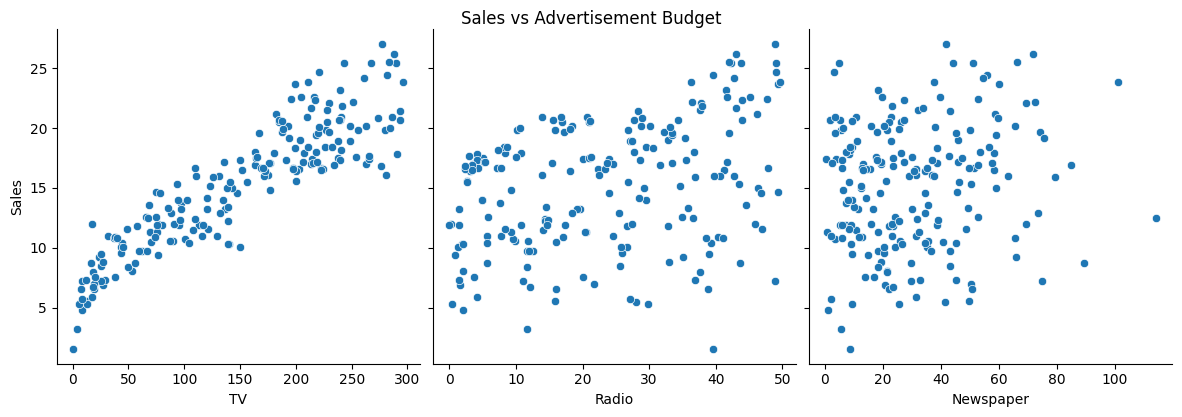

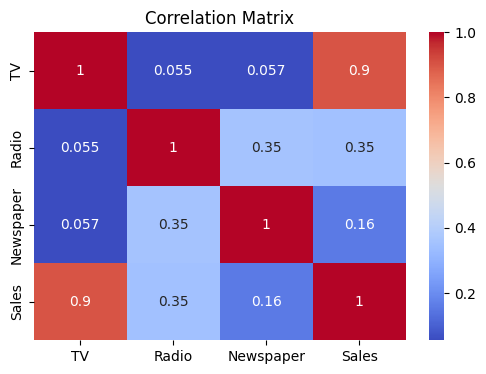

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize pairwise relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter', height=4)
plt.suptitle("Sales vs Advertisement Budget", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("📊 Model Evaluation:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²) Score:", r2_score(y_test, y_pred))


📊 Model Evaluation:
Mean Squared Error (MSE): 2.9077569102710896
R-squared (R²) Score: 0.9059011844150826


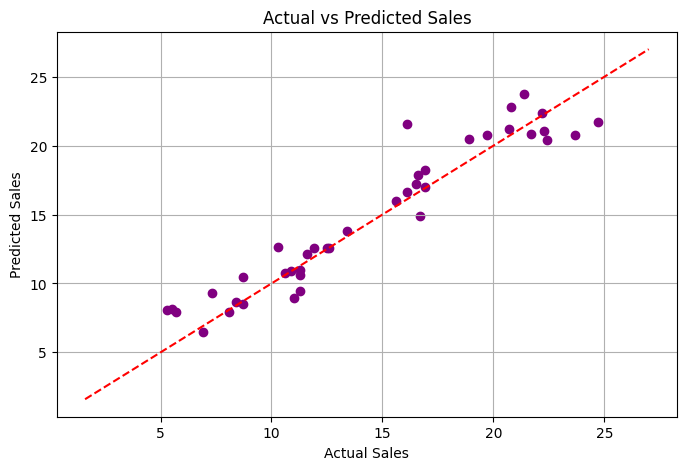

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # reference line
plt.grid(True)
plt.show()
